# Exploratory Data Analysis (EDA)

Personal Expenses Tracker

In [3]:

import sqlite3
import pandas as pd
import matplotlib.pyplot as plt


In [4]:

# Load data from SQLite
conn = sqlite3.connect("expenses.db")
df = pd.read_sql("SELECT * FROM expenses", conn)
df.head()


,id,date,category,payment_mode,description,amount,cashback
0,1,2025-07-13,Groceries,Online,Groceries - there,2480.48,49.61
1,2,2025-08-14,Health,Cash,Health - carry,3233.33,0.00
2,3,2025-11-07,Subscriptions,Online,Subscriptions - physical,3630.97,0.00
3,4,2025-10-23,Groceries,Cash,Groceries - commercial,4314.53,86.29
4,5,2025-07-30,Transportation,Online,Transportation - ago,666.74,0.00


In [7]:

# Dataset overview
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2401 entries, 0 to 2400
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            2401 non-null   int64  
 1   date          2401 non-null   object 
 2   category      2401 non-null   object 
 3   payment_mode  2401 non-null   object 
 4   description   2401 non-null   object 
 5   amount        2401 non-null   float64
 6   cashback      2401 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 131.4+ KB


In [9]:

# Descriptive statistics
df.describe()


,id,amount,cashback
count,2401.000000,2401.000000,2401.000000
mean,1201.000000,2559.353582,58.521628
std,693.253321,1419.784218,68.393324
min,1.000000,53.040000,0.000000
25%,601.000000,1324.020000,0.000000
50%,1201.000000,2527.730000,35.110000
75%,1801.000000,3777.930000,89.660000
max,2401.000000,4999.490000,249.970000


In [11]:

# Missing values
df.isna().sum()


id              0
date            0
category        0
payment_mode    0
description     0
amount          0
cashback        0
dtype: int64

In [13]:
# Check all column names
print(df.columns)


Index(['id', 'date', 'category', 'payment_mode', 'description', 'amount',
       'cashback'],
      dtype='object')


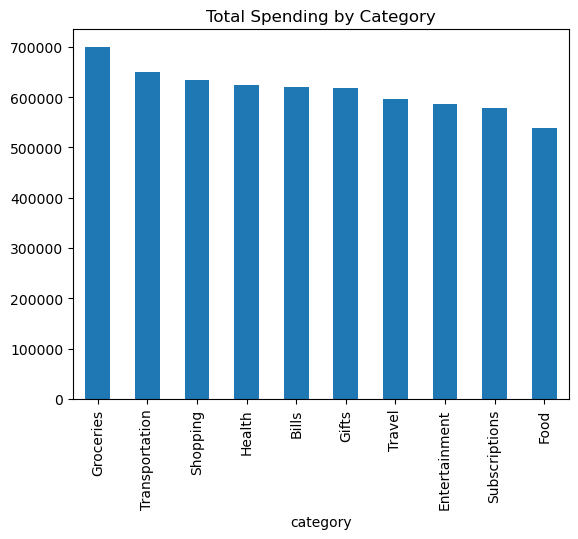

In [15]:

# Total spending by category
category_spend = df.groupby("category")["amount"].sum().sort_values(ascending=False)
category_spend.plot(kind="bar", title="Total Spending by Category")
plt.show()


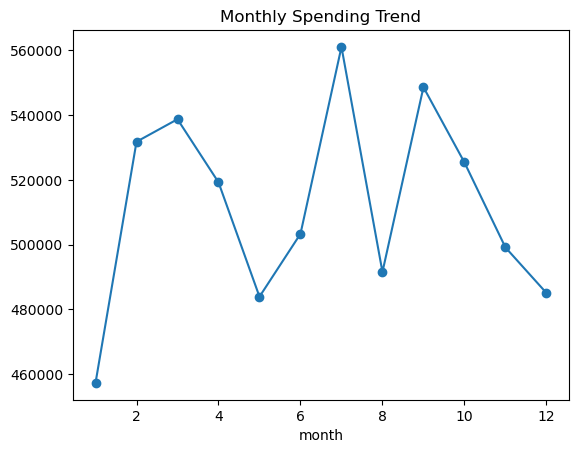

In [17]:

# Monthly spending trend
df["month"] = pd.to_datetime(df["date"]).dt.month
monthly_spend = df.groupby("month")["amount"].sum()
monthly_spend.plot(marker="o", title="Monthly Spending Trend")
plt.show()


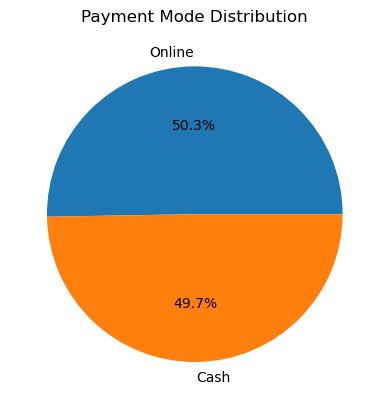

In [19]:

# Payment mode distribution
df["payment_mode"].value_counts().plot(kind="pie", autopct="%1.1f%%", title="Payment Mode Distribution")
plt.ylabel("")
plt.show()


## Key Insights
- Identified top spending categories
- Observed monthly trends
- Analyzed payment preferences